<a href="https://colab.research.google.com/github/ftcelepcikay/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning/blob/master/Exercise_3_CNN_VisualizeCNNLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [2]:
import tensorflow as tf

# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True
            
Callback = myCallback()

# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# YOUR CODE STARTS HERE
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model fitting
model.fit(training_images, training_labels, epochs = 20, callbacks=[Callback])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1344 - accuracy: 0.9596
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9977
Epoch 9/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984
Reached 99.8% accurac

In [3]:
model.evaluate(training_images, training_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9993


[0.002249205019325018, 0.9993333220481873]

In [4]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9876


[0.05420724302530289, 0.9876000285148621]

In [5]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


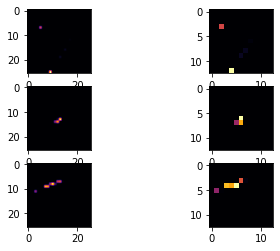

In [16]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,2)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 0  # filter number [0:63]
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [12]:
f1.shape

(1, 13, 13, 64)